In [1]:
from source.refine import *

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/semyon/mipt/GPCR-TEAM/env/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sum', 'cosh', 'sinh', 'tan', 'tanh', 'degrees', 'bar', 'byte', 'bytes', 'cos', 'sin', 'sqrt', 'radians', 'dot', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
path_a = "../output/6awr_chainA_prep.pdb"
path_b = "../output/6awr_chainB_prep.pdb"
path = "6awr_cA_RED.B99990002.pdb"
# path = "../data/6awr.pdb"

In [4]:
# protein = pdy.parsePDB(path)
chain_a = pdy.parsePDB(path_a)
chain_b = pdy.parsePDB(path_b)
protein = pdy.parsePDB(path)

OSError: ../output/6awr_chainA_prep.pdb is not a valid filename or a valid PDB identifier.

In [19]:
full = chain_a + chain_b
pdy.writePDB("../output/tmp_system.pdb", protein)

'../output/tmp_system.pdb'

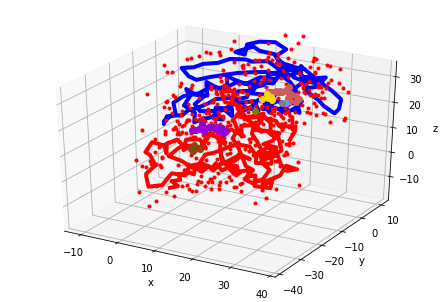

In [20]:
pdy.showProtein(protein.select("chain A"), A='blue')
pdy.showProtein(protein.select("chain B"), B='red')
pylab.show()

In [11]:
force_field = "amber14/protein.ff14SB.xml"
create_system(path, forcefield_name=force_field)
# "../output/tmp_system.pdb"
t0 = time.time()
drs = DRSystem("../output/tmp_system.pdb", forcefield_name=force_field)
print("construction of system:", -t0 + time.time(), "sec")
t0 = time.time()
nmw = NMSpaceWrapper(drs, n_modes=5)
print("construction of NM wrapper:", -t0 + time.time(), "sec")

OSError: 6awr_cA_RED.B99990002.pdb is not a valid filename or a valid PDB identifier.

In [4]:
print("POSITION:\n{}".format(drs.get_position()))
print("FORCE:\n{}".format(drs.get_force()))
print("ENERGY:\n{}".format(drs.get_energy()))

POSITION:
[[ -3.31   68.995  -8.666]
 [ -3.312  70.017  -8.482]
 [ -2.981  68.491  -7.793]
 ...
 [ 13.045  59.649 -10.135]
 [ 13.46   60.383 -11.728]
 [ 17.823  59.643 -10.545]]
FORCE:
[[-170.13881836  170.54705182 -381.84728117]
 [ -39.46084354  -57.46509326   -1.28318654]
 [ 163.6735801  -275.04277799  586.6397355 ]
 ...
 [  45.20746714   -1.60862322  -10.01255564]
 [ -48.24416473   13.17345614   17.28681141]
 [-156.06352292  338.86667876  317.24112723]]
ENERGY:
-9735.621086658488


In [9]:
t = np.array([1.0, -2., 0.])
r = rotation_matrix(0, 0, 90)
nmw.set_rigid(t, r)
# pdy.showProtein(drs._ligand, A='green')
nmw.set_rigid(np.array([0, 0,  0]), rotation_matrix(0, 0, 90))
init_pos = drs.get_init_position()
curr_pos = drs.get_position()
pdy.showProtein(drs._ligand_init, A='blue', linewidth=1)
pdy.showProtein(drs._ligand, A='red', width=1)
pylab.show()
# for i in range(len(init_pos)):
#     print("offset:", curr_pos[i] - init_pos[i])

NameError: name 'nmw' is not defined